In [5]:
 
# Start
 
!pip install matplotlib
!pip install requirements.txt
!pip install yfinance
!pip install seaborn
!pip install numpy
!pip install quandl
 
import quandl, math
import numpy as np
import pandas as pd
from sklearn import preprocessing, svm
#, cross_validation, svm
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import datetime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement requirements.txt (from versions: none)
ERROR: No matching distribution found for requirements.txt
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


df = yf.download("SPY", start="2019-01-01", end="2022-03-22")


df['HL_PCT'] = (df['High'] - df['Low']) / df['Low'] * 100.0
df['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
df = df[['Adj Close', 'HL_PCT', 'PCT_change','Volume']]
#print(df)
 
forecast_col= 'Adj Close'
#forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.2 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)
print(df.head())


[*********************100%***********************]  1 of 1 completed
             Adj Close    HL_PCT  PCT_change     Volume       label
Date                                                               
2019-01-02  235.136414  2.138650    1.707455  126925200  273.196930
2019-01-03  229.525436  2.010920   -1.619461  144140700  272.124939
2019-01-04  237.213547  2.403205    1.938690  142628800  274.041138
2019-01-07  239.083908  1.692556    0.668805  103139100  277.541412
2019-01-08  241.330170  1.303149   -0.019476  102512600  277.418182


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.7387530488234443


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/pa

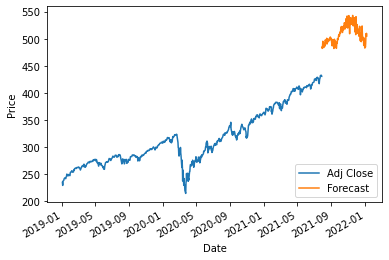

In [7]:

 
 
X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
df.dropna(inplace=True)
 
y = np.array(df['label'])
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#clf =  svm.SVR() # #LinearRegression()
clf =  LinearRegression()
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)
forecast_set = clf.predict(X_lately)
df['Forecast'] = np.nan
 
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day
 
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
 
df['Adj Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [8]:
import scipy.stats
from numpy import sqrt, log, exp, pi

N = scipy.stats.norm.cdf
d1 = (log(S/K) + (r+sigma**2/2)*t) / (sigma*sqrt(t))
d2 = d1 - sigma * sqrt(t)
x = bs_price('c', 2000,1900,0.001,30,0.3)

def bs_price(c_p, S, K, r, t, sigma):
    if c_p == 'c':
        return N(d1) * S - N(d2) * K * exp(-r*t)
    elif c_p == 'p':
        return N(-d2) * K * exp(-r*t) - N(-d1) * S
    else:
        return "Please specify call or put options."

NameError: ignored